Standard SVC 

StandardScaler() is a scikit-learn data preprocessing class that helps normalize the scale of data, which is important for many machine learning algorithms. When applied to a dataset, StandardScaler() calculates the mean and standard deviation for each feature. It then normalizes the values by subtracting the mean and dividing by the standard deviation, resulting in standardized values. This ensures that the mean of the transformed features is zero and the standard deviation is one. Normalizing the data in this way allows machine learning algorithms to perform better, as they are less influenced by variations in the scale or distribution of the input data. StandardScaler() plays a crucial role in preparing data for machine learning models.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/projects.csv')

df['finalizado'] = df['nao_finalizado'].map({1:0, 0:1})
df = df.query('horas_esperadas > 0')

df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [7]:
y = df['finalizado']

x = df[['horas_esperadas', 'preco']]

seed = 2043

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state=seed, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


model = SVC(gamma = 'auto')
model.fit(treino_x,treino_y)

prevision = model.predict(teste_x)

accuracy = accuracy_score(teste_y, prevision) * 100

print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 67.78%


-1.7204367180164735 1.7375665606605448 -0.599129071525413 5.0256262997224495


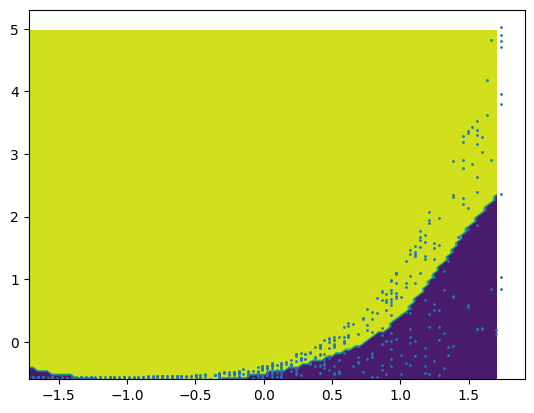

In [10]:
data_col1 = teste_x[:,0]
data_col2 = teste_x[:,1]

min_x = data_col1.min()
max_x = data_col1.max()

min_y = data_col2.min()
max_y = data_col2.max()

print(min_x, max_x, min_y, max_y)

pixels = 100


x_axis = np.arange(min_x, max_x, (max_x - min_x) / pixels)
y_axis = np.arange(min_y, max_y, (max_y - min_y) / pixels)


xx, yy = np.meshgrid(x_axis, y_axis)

points = np.c_[xx.ravel(), yy.ravel()]

z = model.predict(points)

z = np.array(z).reshape(xx.shape)

plt.contourf(xx, yy, z)

plt.scatter(data_col1, data_col2, s=1)

# Aprendizados

    Comparar a saída do modelo linear LinearSVC em relação ao modelo não linear SVC;
    Aplicar o modelo SVC da scikit-learn para capturar relações não lineares;
    Utilizar a reescalação de dados com StandardScaler para melhorar performance e acurácia do modelo;
    Entender a importância da definição dos parâmetros de modelos de Machine Learning;
    Analisar a saída do modelo SVC após o treinamento.